In [1]:
from torch import tensor, nn
import numpy as np
import torch

## 0. Tensor

torch.Tensor是一种包含单一数据类型元素的多维矩阵。Torch定义了七种CPU tensor类型和八种GPU tensor类型：

|Data type|	 CPU tensor | GPU tensor|
|:---|:---|:---|
|32-bit floating point|	torch.FloatTensor|	torch.cuda.FloatTensor|
|64-bit floating point|	torch.DoubleTensor|	torch.cuda.DoubleTensor|
|16-bit floating point|	N/A|	torch.cuda.HalfTensor|
|8-bit integer (unsigned)|	torch.ByteTensor|	torch.cuda.ByteTensor|
|8-bit integer (signed)|	torch.CharTensor|	torch.cuda.CharTensor|
|16-bit integer (signed)|	torch.ShortTensor|	torch.cuda.ShortTensor|
|32-bit integer (signed)|	torch.IntTensor|	torch.cuda.IntTensor|
|64-bit integer (signed)|	torch.LongTensor|	torch.cuda.LongTensor|

- `torch.tensor`和`torch.Tensor`的区别

In [2]:
torch.Tensor([5, 4]).type()

'torch.FloatTensor'

In [3]:
torch.tensor([5, 4]).type()  # tensor接受已经存在的数据

'torch.LongTensor'

In [4]:
torch.Tensor(5, 4)  #  Tensor创建一个多维矩阵

tensor([[-1.5330e-05,  4.5633e-41, -1.5330e-05,  4.5633e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [5]:
print(torch.Tensor(5), torch.Tensor([5]), torch.tensor(5), sep='\n')

tensor([0., 0., 0., 0., 0.])
tensor([5.])
tensor(5)


- 不同类别的`Tensor`

In [6]:
torch.IntTensor([[1, 2, 3], [4, 5, 6]])  # 一个张量tensor可以从Python的list或序列构建：

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [7]:
torch.ShortTensor(2, 4).zero_()  # 一个空张量tensor可以通过规定其大小来构建：

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int16)

In [8]:
torch.ByteTensor(range(10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.uint8)

In [9]:
torch.ShortTensor(np.arange(10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int16)

In [10]:
u = np.random.randint(10, size=(2, 10))
u = torch.from_numpy(u)  # 默认转为LongTensor
u.type()

'torch.LongTensor'

In [11]:
u.requires_grad

False

In [12]:
u.type()

'torch.LongTensor'

In [13]:
u = u.type(torch.FloatTensor)

In [14]:
u.requires_grad = True  # 附加梯度，反向传播时计算

In [15]:
u

tensor([[6., 0., 0., 8., 6., 5., 7., 1., 0., 8.],
        [0., 9., 7., 1., 4., 4., 3., 6., 7., 6.]], requires_grad=True)

## 1.常用函数

In [108]:
x = torch.randint(1, 50, size=(10, 5))
x

tensor([[25, 31,  2,  7, 40],
        [30, 45, 24, 27, 26],
        [38, 39,  2, 16, 19],
        [38, 12, 28, 40, 41],
        [10, 48, 11, 42, 35],
        [41,  8, 47,  7, 46],
        [40, 38,  8, 26,  2],
        [49, 33, 26, 41, 24],
        [41, 13, 32, 20, 38],
        [21, 40, 37, 16,  6]])

In [18]:
x.size()

torch.Size([10, 5])

In [19]:
x.shape  # 各维度上的数量

torch.Size([10, 5])

In [20]:
x.reshape(5, 10)  # 重塑形状

tensor([[46, 31, 27, 46, 28, 30, 34, 38, 41,  8],
        [38, 38, 15, 31,  8, 23, 12, 45, 24, 16],
        [29, 25,  1, 18, 31,  9,  1, 36, 27,  2],
        [20, 11, 14, 38,  3, 22, 24, 22, 39, 33],
        [ 4, 23, 13,  4, 49, 27, 32,  9,  5, 38]])

In [21]:
x.reshape(5, -1)  # 如果某一维度为-1，则根据总元素个数自动计算该轴长度

tensor([[46, 31, 27, 46, 28, 30, 34, 38, 41,  8],
        [38, 38, 15, 31,  8, 23, 12, 45, 24, 16],
        [29, 25,  1, 18, 31,  9,  1, 36, 27,  2],
        [20, 11, 14, 38,  3, 22, 24, 22, 39, 33],
        [ 4, 23, 13,  4, 49, 27, 32,  9,  5, 38]])

In [22]:
x.numel()  # 元素个数

50

In [23]:
torch.arange(1, 10, 2)  # torch.range()也可用，建议用前者

tensor([1, 3, 5, 7, 9])

In [24]:
torch.linspace(1, 10, 20)

tensor([ 1.0000,  1.4737,  1.9474,  2.4211,  2.8947,  3.3684,  3.8421,  4.3158,
         4.7895,  5.2632,  5.7368,  6.2105,  6.6842,  7.1579,  7.6316,  8.1053,
         8.5789,  9.0526,  9.5263, 10.0000])

In [25]:
torch.ones_like(x)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])

In [26]:
torch.ones(10)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
torch.zeros_like(x)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [29]:
torch.randn(10, 2)

tensor([[ 0.4275,  2.0017],
        [-0.7983, -1.1762],
        [-0.3511,  0.7200],
        [-1.3026, -1.2835],
        [-1.8898,  1.3914],
        [ 0.4068,  1.0765],
        [-0.2782, -1.6487],
        [ 0.1952, -0.0390],
        [-0.5314,  2.0266],
        [-1.7151, -0.2893]])

In [30]:
y = torch.randn(10, 1, 1, 1)  # 10*1*1*1
y

tensor([[[[ 1.8496]]],


        [[[-0.0138]]],


        [[[ 1.9571]]],


        [[[ 0.4324]]],


        [[[ 1.2580]]],


        [[[ 1.7937]]],


        [[[ 0.2128]]],


        [[[ 0.5365]]],


        [[[-0.9809]]],


        [[[-1.0537]]]])

In [31]:
y = torch.squeeze(y)  # 10

In [32]:
z = torch.arange(10).reshape(2, 5)
z

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [33]:
z.t()  # 输入一个矩阵（2维张量），并转置0, 1维。 可以被视为函数transpose(input, 0, 1)的简写函数。

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [34]:
torch.sign(y)

tensor([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

In [35]:
torch.sigmoid(y)  # 返回一个新张量，包含输入input张量每个元素的sigmoid值。

tensor([0.8641, 0.4966, 0.8762, 0.6065, 0.7787, 0.8574, 0.5530, 0.6310, 0.2727,
        0.2585])

In [36]:
torch.norm(y, p=2)  # 返回输入张量input 的p 范数

tensor(3.8267)

In [37]:
torch.median(y)  # 返回输入张量给定维度每行的中位数，同时返回一个包含中位数的索引的LongTensor。

tensor(0.4324)

In [38]:
torch.prod(y)  # 返回输入张量input 所有元素的积。

tensor(-0.0057)

In [39]:
torch.sort(y, dim=0, descending=True)  # 对输入张量input沿着指定维按升序排序。如果不给定dim，则默认为输入的最后一维。如果指定参数descending为True，则按降序排序

torch.return_types.sort(
values=tensor([ 1.9571,  1.8496,  1.7937,  1.2580,  0.5365,  0.4324,  0.2128, -0.0138,
        -0.9809, -1.0537]),
indices=tensor([2, 0, 5, 4, 7, 3, 6, 1, 8, 9]))

In [40]:
torch.relu(torch.randn(10))

tensor([0.0000, 0.0000, 1.7989, 0.0000, 0.0000, 1.3552, 1.7876, 0.0000, 0.0565,
        0.0000])

- 二元运算

In [41]:
a = torch.arange(10)
b = torch.arange(10, 20)

In [42]:
a * b  # 按元素乘

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

In [43]:
torch.mul(a, b)  # 按元素乘

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

In [44]:
torch.matmul(a, b)

tensor(735)

In [45]:
torch.mm(a.reshape(1, -1), b.reshape(-1, 1))

tensor([[735]])

In [46]:
torch.dot(a, b)  # 內积

tensor(735)

In [47]:
a @ b

tensor(735)

In [48]:
x = torch.rand(4, 3)
y = torch.rand(3, 4)

In [49]:
torch.mm(x, y)  # 矩阵乘法: 对矩阵mat1和mat2进行相乘。 如果mat1 是一个n×m张量，mat2 是一个 m×p张量，将会输出一个 n×p张量out。

tensor([[0.1233, 0.4722, 0.3018, 0.3533],
        [0.5407, 1.1753, 0.7222, 1.0453],
        [0.4835, 0.6027, 0.3450, 0.6825],
        [0.1655, 0.7006, 0.4715, 0.5331]])

In [50]:
torch.matmul(x, y)

tensor([[0.1233, 0.4722, 0.3018, 0.3533],
        [0.5407, 1.1753, 0.7222, 1.0453],
        [0.4835, 0.6027, 0.3450, 0.6825],
        [0.1655, 0.7006, 0.4715, 0.5331]])

In [51]:
x @ y  # 矩阵乘法运算符

tensor([[0.1233, 0.4722, 0.3018, 0.3533],
        [0.5407, 1.1753, 0.7222, 1.0453],
        [0.4835, 0.6027, 0.3450, 0.6825],
        [0.1655, 0.7006, 0.4715, 0.5331]])

In [52]:
z = torch.rand(3)

In [53]:
torch.mv(x, z)  # 矩阵向量乘： 对矩阵mat和向量vec进行相乘。 如果mat 是一个n×m张量，vec 是一个m元 1维张量，将会输出一个n元 1维张量。

tensor([0.7206, 1.6499, 0.7162, 0.7673])

In [54]:
x @ z

tensor([0.7206, 1.6499, 0.7162, 0.7673])

In [56]:
a = tensor(range(10), dtype=torch.float32).reshape(2, 5)
b = tensor(range(10, 20), dtype=torch.float32).reshape(2, 5)
c = tensor(range(20, 30), dtype=torch.float32).reshape(2, 5)

In [57]:
cat_ = torch.cat([a, b, c], 0)  # 在给定维度上对输入的张量序列进行连接操作，和extend类似
cat_

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]])

In [223]:
if torch.sum(a) > 10:
    print(1)

In [58]:
torch.cat([a, b, c], 1)

tensor([[ 0.,  1.,  2.,  3.,  4., 10., 11., 12., 13., 14., 20., 21., 22., 23.,
         24.],
        [ 5.,  6.,  7.,  8.,  9., 15., 16., 17., 18., 19., 25., 26., 27., 28.,
         29.]])

In [59]:
stack_ = torch.stack([a, b, c], 0)  # 沿着一个新维度对输入张量序列进行连接。 序列中所有的张量都应该为相同形状。

In [60]:
stack_

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.]],

        [[10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]],

        [[20., 21., 22., 23., 24.],
         [25., 26., 27., 28., 29.]]])

In [61]:
stack_.split([2, 3], -1)

(tensor([[[ 0.,  1.],
          [ 5.,  6.]],
 
         [[10., 11.],
          [15., 16.]],
 
         [[20., 21.],
          [25., 26.]]]),
 tensor([[[ 2.,  3.,  4.],
          [ 7.,  8.,  9.]],
 
         [[12., 13., 14.],
          [17., 18., 19.]],
 
         [[22., 23., 24.],
          [27., 28., 29.]]]))

In [62]:
stack_.chunk(2, 1)

(tensor([[[ 0.,  1.,  2.,  3.,  4.]],
 
         [[10., 11., 12., 13., 14.]],
 
         [[20., 21., 22., 23., 24.]]]),
 tensor([[[ 5.,  6.,  7.,  8.,  9.]],
 
         [[15., 16., 17., 18., 19.]],
 
         [[25., 26., 27., 28., 29.]]]))

## 2. 自动求导`autograd`

torch.autograd提供了类和函数用来对任意标量函数进行求导。

实例:
$$
f(\mathbf{x})=2\mathbf{x}+1, g(y)=\mathbf{y^2}+5, z=mean(\mathbf{g(y)})
$$
求$\frac{dz}{dx}$

In [102]:
def f(x:tensor):
    return 2*x + 1

def g(x:tensor):
    return x**2 + 5

def mean(x:tensor):
    return torch.mean(x)

In [103]:
def dz_dx(x:tensor):  # 实际上的导数
    return (8*x + 4) / x.numel()

In [104]:
x = torch.randint(1, 10, size=(2, 5), dtype=torch.float32, requires_grad=True)

In [105]:
x.requires_grad
# x.requires_grad_(True)  # 如果为False, 可以追加

True

In [106]:
x.requires_grad_(True)

tensor([[2., 1., 1., 6., 4.],
        [9., 1., 1., 1., 7.]], requires_grad=True)

torch自动求导结果

In [107]:
z = mean(g(f(x)))
z.backward()  # 反向传播，自动求微分
x.grad  # dz/dx

tensor([[2.0000, 1.2000, 1.2000, 5.2000, 3.6000],
        [7.6000, 1.2000, 1.2000, 1.2000, 6.0000]])

解析求导结果

In [69]:
dz_dx(x)  # dz/dx

tensor([[2.0000, 4.4000, 6.8000, 6.8000, 5.2000],
        [1.2000, 1.2000, 7.6000, 1.2000, 1.2000]])

In [70]:
z.grad_fn

In [255]:
a

tensor([[-0.0661,  1.5137,  0.3131,  0.4511, -0.3176,  0.0339,  1.9279, -0.6785],
        [-0.4154, -0.0785, -0.2298, -1.5693, -0.0510, -0.7082, -1.7840, -0.6868],
        [ 0.2478, -0.3430, -0.3230, -1.1113, -0.1756, -1.6640, -0.0503, -2.5351],
        [-0.6111,  0.5888,  0.5588, -0.4058,  0.5706, -1.1026,  1.1135, -2.5508]])

In [259]:
torch.cat([a, a[:5]])

tensor([[-0.0661,  1.5137,  0.3131,  0.4511, -0.3176,  0.0339,  1.9279, -0.6785],
        [-0.4154, -0.0785, -0.2298, -1.5693, -0.0510, -0.7082, -1.7840, -0.6868],
        [ 0.2478, -0.3430, -0.3230, -1.1113, -0.1756, -1.6640, -0.0503, -2.5351],
        [-0.6111,  0.5888,  0.5588, -0.4058,  0.5706, -1.1026,  1.1135, -2.5508],
        [-0.0661,  1.5137,  0.3131,  0.4511, -0.3176,  0.0339,  1.9279, -0.6785],
        [-0.4154, -0.0785, -0.2298, -1.5693, -0.0510, -0.7082, -1.7840, -0.6868],
        [ 0.2478, -0.3430, -0.3230, -1.1113, -0.1756, -1.6640, -0.0503, -2.5351],
        [-0.6111,  0.5888,  0.5588, -0.4058,  0.5706, -1.1026,  1.1135, -2.5508]])

In [260]:
a

tensor([[-0.0661,  1.5137,  0.3131,  0.4511, -0.3176,  0.0339,  1.9279, -0.6785],
        [-0.4154, -0.0785, -0.2298, -1.5693, -0.0510, -0.7082, -1.7840, -0.6868],
        [ 0.2478, -0.3430, -0.3230, -1.1113, -0.1756, -1.6640, -0.0503, -2.5351],
        [-0.6111,  0.5888,  0.5588, -0.4058,  0.5706, -1.1026,  1.1135, -2.5508]])

## 3. 案例: Bass模型拟合

In [269]:
def grad_desc(lossfunc, x0, x1, max_iters=200, learn_rate=0.05):
    """
    f: 待优化目标函数, grad_f: f的梯度, x0: 参数初值, x1:固定参数值, learn_rate: 学习率
    """
    trace_x = x0.clone().data.reshape(1, -1)
    x = x0
    i = 0
    for i in range(max_iters):
        l = lossfunc(x, x1)
        l.backward()
        x.data.sub_(learn_rate * x.grad.data)
        with torch.no_grad():
            trace_x = torch.cat([trace_x, x.detach().data.reshape(1, -1)], 0)
            if i % 10 == 0:
                loss = lossfunc(x, x1).data.numpy()
                print(f"迭代次数: {i}, 损失函数值: {loss:.4f}")
                
            if torch.sum(torch.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # 停止条件
                break

        x.grad.zero_()

    print(f"共迭代{i}次, 损失函数值: {lossfunc(x, x1).data.numpy():.4f}, 最优参数值: {x.tolist()}")
    return trace_x

In [ ]:
def adaptive_momentum(lossfunc, x0, x1, beta1=0.5, beta2=0.5, learn_rate=0.05):
    trace_x = x0.clone().data.reshape(1, -1)
    x = x0
    m_0, v_0 = 0, 0
    i = 0
    while True:
        l = lossfunc(x0, x1)
        l.backward()
        m_1 = beta1 * m_0 + (1 - beta1) * x.grad.data
        v_1 = beta2 * v_0 + (1 - beta2) * x.grad.data ** 2
        x = x - learn_rate * m_1 / np.sqrt(v_1)
        trace_x = np.concatenate([trace_x, x.reshape(1, -1)])
        if i % 5 == 0:
            print(f"迭代次数: {i}, 目标函数值f: {f(x):.6f}")

        if np.sum(np.abs(trace_x[-1] - trace_x[-2])) < 1e-3:  # 停止条件
            break

        m_0, v_0 = m_1, v_1
        i += 1

    print(f"共迭代{len(trace_x)}次, 目标函数: {f(x)}, 最优参数值: {x.tolist()}")
    return trace_x

In [145]:
def bass(params, T:int): # 如果要使用其它模型，可以重新定义
    p, q, m = params
    t_tensor = torch.arange(1, T + 1, dtype=torch.float32)
    a = 1 - torch.exp(- (p + q) * t_tensor)
    b = 1 + q / p * torch.exp(- (p + q) * t_tensor)
    diffu_cont = m * a / b

    adopt_cont = torch.zeros_like(diffu_cont)
    adopt_cont[0] = diffu_cont[0]
    for t in range(1, T):
        adopt_cont[t] = diffu_cont[t] - diffu_cont[t - 1]
        
    return adopt_cont

In [146]:
def meanSquaredLoss(params, y):  # 平均平方误差
    T = y.numel()
    hat_y = bass(params, T)
    return torch.mean((hat_y - y)**2)

In [147]:
def r_2(params, y):  # R2
    T = y.numel()
    hat_y = bass(params, T)
    tse = torch.sum((y - hat_y)**2)
    ssl = torch.sum((y - torch.mean(y))**2)
    R_2 = (ssl - tse)/ssl
    return R_2

In [148]:
y = tensor([96, 195, 238, 380, 1045, 1230, 1267, 1828, 1586, 1673, 1800, 1580, 1500], dtype=torch.float32)

In [270]:
params = torch.FloatTensor([0.001, 0.2, 20000])
params.requires_grad_(True)
res = grad_desc(meanSquaredLoss, params, y, learn_rate=1e-9)

迭代次数: 0, 损失函数值: 4460772.5000
迭代次数: 10, 损失函数值: 257742.6094
迭代次数: 20, 损失函数值: 209520.5312
迭代次数: 30, 损失函数值: 170366.9844
迭代次数: 40, 损失函数值: 139058.3125
迭代次数: 50, 损失函数值: 114313.3672
迭代次数: 60, 损失函数值: 94923.4453
迭代次数: 70, 损失函数值: 79821.5391
迭代次数: 80, 损失函数值: 69308.0234
迭代次数: 90, 损失函数值: 71127.9688
迭代次数: 100, 损失函数值: 62323.8125
迭代次数: 110, 损失函数值: 193903.9375
迭代次数: 120, 损失函数值: 86953.7422
迭代次数: 130, 损失函数值: 79675.9922
迭代次数: 140, 损失函数值: 162443.4062
迭代次数: 150, 损失函数值: 145275.3281
迭代次数: 160, 损失函数值: 68090.8125
迭代次数: 170, 损失函数值: 301613.2812
迭代次数: 180, 损失函数值: 190353.5156
迭代次数: 190, 损失函数值: 178860.1406
共迭代199次, 损失函数值: 126012.3203, 最优参数值: [0.023303769528865814, 0.26975032687187195, 20000.0]


In [219]:
res[-1]

array([2.3303770e-02, 2.6975033e-01, 2.0000000e+04], dtype=float32)

In [169]:
params = torch.FloatTensor([0.001, 0.2, 20000])
params.requires_grad_(True)
lr = 7e-10
for i in range(200):
    r = meanSquaredLoss(params, y)
    r.backward()
    params.data.sub_(lr * params.grad.data)
    with torch.no_grad():
        r2 = r_2(params, y)
        p, q, m = params.detach().numpy()
        if i % 10 == 0:
#             print(params.grad.data)
            print(f"第{i+1}轮, r2={r2.detach().numpy():.4f}\n    p:{p:.4f}, q:{q:.4f}, m:{m:.4f}")
    params.grad.data.zero_()  # 清空梯度，否则会累加

第1轮, r2=-6.6587
    p:0.1568, q:0.2015, m:20000.0000
第11轮, r2=0.4595
    p:0.0262, q:0.1770, m:20000.0000
第21轮, r2=0.5324
    p:0.0242, q:0.1910, m:20000.0000
第31轮, r2=0.5950
    p:0.0227, q:0.2041, m:20000.0000
第41轮, r2=0.6483
    p:0.0213, q:0.2162, m:20000.0000
第51轮, r2=0.6936
    p:0.0201, q:0.2273, m:20000.0000
第61轮, r2=0.7318
    p:0.0190, q:0.2375, m:20000.0000
第71轮, r2=0.7639
    p:0.0181, q:0.2469, m:20000.0000
第81轮, r2=0.7909
    p:0.0173, q:0.2555, m:20000.0000
第91轮, r2=0.8135
    p:0.0166, q:0.2633, m:20000.0000
第101轮, r2=0.8324
    p:0.0159, q:0.2705, m:20000.0000
第111轮, r2=0.8482
    p:0.0154, q:0.2771, m:20000.0000
第121轮, r2=0.8614
    p:0.0149, q:0.2831, m:20000.0000
第131轮, r2=0.8724
    p:0.0144, q:0.2886, m:20000.0000
第141轮, r2=0.8815
    p:0.0140, q:0.2936, m:20000.0000
第151轮, r2=0.8355
    p:0.0106, q:0.2979, m:20000.0000
第161轮, r2=0.7550
    p:0.0090, q:0.2982, m:20000.0000
第171轮, r2=0.8359
    p:0.0106, q:0.2981, m:20000.0000
第181轮, r2=0.7543
    p:0.0089, q:0.298

## 4. 构建网络的流程

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import nn

### 1. 定义计算架构

In [79]:
class Net(nn.Module):
    def __init__(self, dim_feature, dim_hidden, dim_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(dim_feature, dim_hidden)
        self.output = nn.Linear(dim_hidden, dim_output)
    
    def forward(self, X):  # 层之间的计算次序
        f1 = torch.relu(self.hidden(X))  # 0-1
        f2 = self.output(f1)  # 1->2
        f3 = nn.functional.softmax(f2, dim=1)  # 2->3
        return f3

In [80]:
net = Net(dim_feature=2, dim_hidden=10, dim_output=2)

In [81]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)  # 指定需优化的参数
loss_func = nn.CrossEntropyLoss()  # 确定训练准则

### 2. 生成测试数据

In [82]:
x0 = torch.randn(100, 2) + 2  # 均值为 2
y0 = torch.zeros(100)
x1 = torch.randn(100, 2) - 2  # 均值为 -2
y1 = torch.ones(100)

x = torch.cat((x0, x1)).type(torch.FloatTensor)
y = torch.cat((y0, y1)).type(torch.LongTensor)

In [83]:
idx = np.arange(len(x))
np.random.shuffle(idx)
train_x, train_y = x[idx[:50]], y[idx[:50]]  # 随机选取50个
test_x, test_y = x[idx[50:]], y[idx[50:]]

In [84]:
train_y

tensor([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0])

### 3. 训练

In [85]:
for i in range(200):
    out = net.forward(train_x)
    loss = loss_func(out, train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 20 == 0:
        with torch.no_grad():
            loss_train = loss_func(out, train_y)
            out_test = net.forward(test_x)
            loss_test = loss_func(out_test, test_y)
            print(f"loss_train: {loss_train}, loss_test: {loss_test}")

loss_train: 0.7122374176979065, loss_test: 0.7174058556556702
loss_train: 0.541682779788971, loss_test: 0.5991703271865845
loss_train: 0.47537553310394287, loss_test: 0.5254762172698975
loss_train: 0.4174279272556305, loss_test: 0.45488861203193665
loss_train: 0.37945857644081116, loss_test: 0.40700799226760864
loss_train: 0.3592231273651123, loss_test: 0.3803348243236542
loss_train: 0.34765303134918213, loss_test: 0.36479997634887695
loss_train: 0.3403357267379761, loss_test: 0.3549650311470032
loss_train: 0.3354053497314453, loss_test: 0.34830278158187866
loss_train: 0.33189812302589417, loss_test: 0.3435502350330353


In [86]:
train_result = net(train_x)
predict_train_y = torch.max(train_result, 1)[1]

test_result = net(test_x)
predict_test_y = torch.max(test_result, 1)[1]

x_list = [train_x, test_x]
y_list = [predict_train_y, predict_test_y]

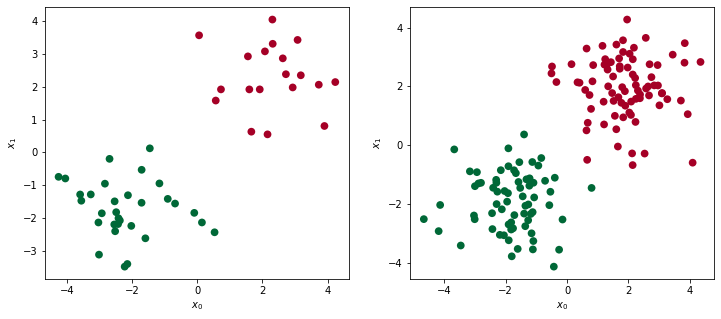

In [87]:
fig = plt.figure(figsize=(12, 5))
for i in range(2):
    px = x_list[i]
    py = y_list[i]
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.scatter(px.data.numpy()[:,0], px.data.numpy()[:,1], c=py.data.numpy(), s=60, lw=0, cmap='RdYlGn')

## 5. 案例： 垃圾邮件分类

In [89]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import os

利用`nn.Module`实现`Logit`回归

In [90]:
class LogitNet(nn.Module):
    def __init__(self, dim_feature, dim_output):
        super(LogitNet, self).__init__()
        self.output = nn.Linear(dim_feature, dim_output)
    
    def forward(self, X):  # 层之间的计算次序
        h = self.output(X)  # 1 -> 2
        o = nn.functional.softmax(h, dim=1)  # 2 -> 3
        return o

In [93]:
df = pd.read_csv('../dataset/smsspamcollection/SMSSpamCollection', delimiter='\t', header=None, names=['category', 'message'])
df['label'] = (df.category == 'ham').astype('int')
print('垃圾邮件数量: %d ' % np.sum(df.label == 0))
print('正常邮件数量: %d ' % np.sum(df.label == 0))

垃圾邮件数量: 747 
正常邮件数量: 747 


In [94]:
X = df.message.values
y = df.label.values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=200)
# y转换为tensor
y_train = torch.tensor(y_train).type(torch.LongTensor)  # 注意label的形式为1维，即类别的标签，无需reshape(-1, 1)
y_test = torch.tensor(y_test).type(torch.LongTensor)
# 获取词的tf-idf
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
# X转换为tensor
X_train = torch.tensor(X_train.toarray(), dtype=torch.float)
X_test = torch.tensor(X_test.toarray(), dtype=torch.float)

In [95]:
batch_size = 300  # 构建每批次100个样本的训练集
dataset = TensorDataset(X_train, y_train)
data_iter = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [96]:
snet = LogitNet(dim_feature=X_train.shape[1], dim_output=2)
optimizer = torch.optim.SGD(snet.parameters(), lr=0.03)  # 指定需优化的参数
# loss_func = nn.CrossEntropyLoss()  # 确定训练准则
loss_func = nn.NLLLoss()

In [97]:
for i in range(100):
    for X, y in data_iter:        
        loss = loss_func(snet.forward(X), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if i % 20 == 0:
        with torch.no_grad():
            loss_train = loss_func(snet.forward(X_train), y_train)
            out_test = snet.forward(X_test)
            loss_test = loss_func(out_test, y_test)
            print(f"loss_train: {loss_train:.5f}, loss_test: {loss_test:.5f}")

loss_train: -0.52046, loss_test: -0.52016
loss_train: -0.76378, loss_test: -0.76112
loss_train: -0.81694, loss_test: -0.81367
loss_train: -0.83521, loss_test: -0.83173
loss_train: -0.84409, loss_test: -0.84049


In [98]:
train_result = snet(X_train)
predict_y_train = torch.max(train_result, 1)[1]
print(torch.sum(predict_y_train != y_train), torch.sum(predict_y_train == y_train))

tensor(368) tensor(2418)


In [99]:
a = torch.randn(4, 8)

In [100]:
torch.std(a, 1)

tensor([0.8956, 0.6590, 0.9498, 1.1990])